In [18]:
import pandas as pd
import numpy as np
import joblib


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../Data/Engineered/BankChurners_Engineered_V2.csv")
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Card_Category_Platinum,Card_Category_Silver,Avg_Transaction_Value,Engagement_Score,Credit_Pressure,High_Credit_Flag,Tenure_Group,Trans_Freq_Group,High_Contact_Flag,Stability_Score
0,0,45,1,3,2.0,39,5,1,3,12691.0,...,0,0,27.238095,46,0.061224,1,1,0,1,1.4800
1,0,49,0,5,4.0,44,6,1,2,8256.0,...,0,0,39.121212,38,0.104651,1,1,0,0,2.6275
2,0,51,1,3,4.0,36,4,1,0,3418.0,...,0,0,94.350000,23,0.000000,0,1,0,0,2.4635
3,0,40,0,4,2.0,34,3,4,1,3313.0,...,0,0,58.550000,19,0.759734,0,1,0,0,1.8690
4,0,40,1,3,1.0,21,5,1,0,4716.0,...,0,0,29.142857,32,0.000000,1,0,0,0,2.3375


In [3]:
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [7]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.920533070088845
Precision: 0.8388429752066116
Recall: 0.6246153846153846
F1 Score: 0.7160493827160493
ROC AUC: 0.9276516076516076

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1701
           1       0.84      0.62      0.72       325

    accuracy                           0.92      2026
   macro avg       0.89      0.80      0.83      2026
weighted avg       0.92      0.92      0.92      2026



In [8]:
dt = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [9]:
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))


Decision Tree Results
Accuracy: 0.9299111549851925
Precision: 0.8101694915254237
Recall: 0.7353846153846154
F1 Score: 0.7709677419354839
ROC AUC: 0.9487595532039976


In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [11]:
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Results
Accuracy: 0.9496544916090819
Precision: 0.9084249084249084
Recall: 0.7630769230769231
F1 Score: 0.8294314381270903
ROC AUC: 0.9797322841767286


In [12]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy,F1 Score
0,Logistic Regression,0.920533,0.716049
1,Decision Tree,0.929911,0.770968
2,Random Forest,0.949654,0.829431


In [13]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Engagement_Score            0.150785
Total_Revolving_Bal         0.100114
Avg_Transaction_Value       0.090445
Trans_Freq_Group            0.085686
Total_Ct_Chng_Q4_Q1         0.083293
Total_Relationship_Count    0.070073
Stability_Score             0.062246
Credit_Pressure             0.051587
Total_Amt_Chng_Q4_Q1        0.043545
Avg_Utilization_Ratio       0.037957
dtype: float64

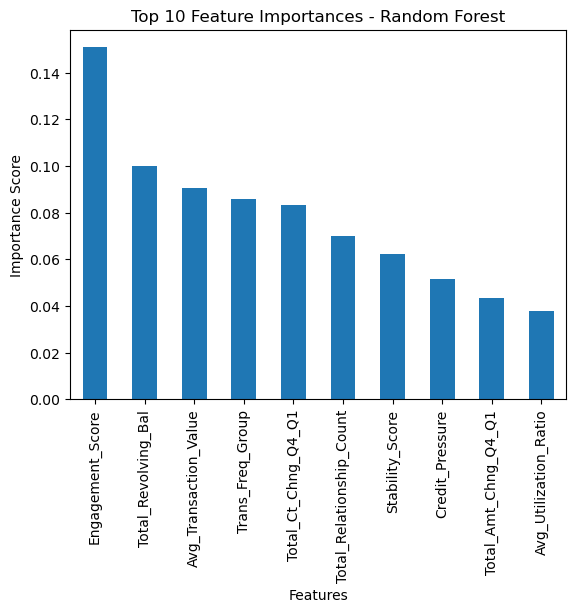

In [14]:
# Extract feature importance
importances = rf.feature_importances_
features = X.columns

# Create importance series
feature_importance = pd.Series(importances, index=features)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot top 10 features
plt.figure()
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


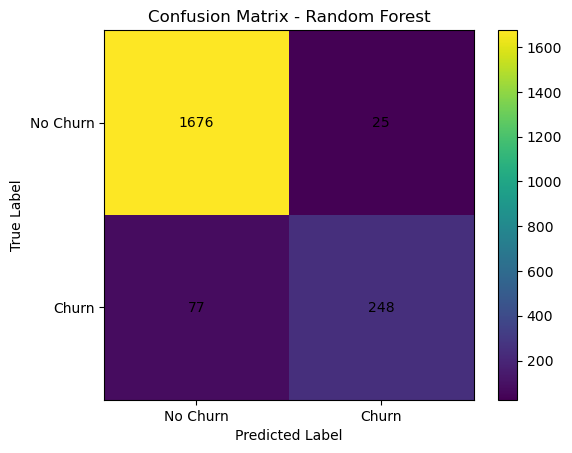

In [15]:
# Predict class labels
y_pred_rf = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()

plt.xticks([0, 1], ["No Churn", "Churn"])
plt.yticks([0, 1], ["No Churn", "Churn"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


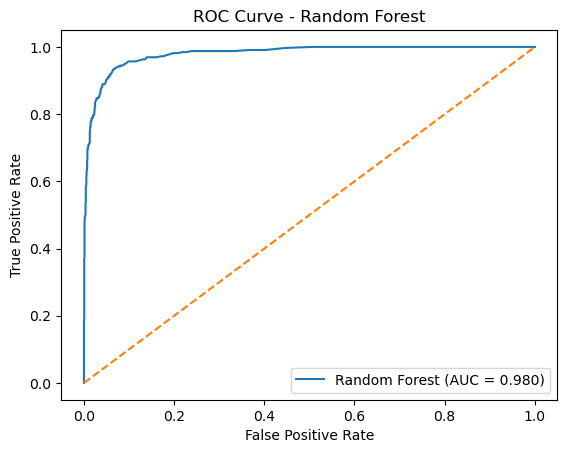

In [16]:
# Predict probabilities for churn class
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [17]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Income_Value', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver',
       'Avg_Transaction_Value', 'Engagement_Score', 'Credit_Pressure',
       'High_Credit_Flag', 'Tenure_Group', 'Trans_Freq_Group',
       'High_Contact_Flag', 'Stability_Score'],
      dtype='object')

In [19]:
joblib.dump(rf, "../models/random_forest_churn_model.pkl")

['../models/random_forest_churn_model.pkl']